In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
warnings.filterwarnings("ignore")

In [2]:
from pandas_profiling import ProfileReport

In [6]:
df = pd.read_excel("./data/Business_case_2_Mobile_Operator.xlsx", sheet_name=1)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 56 columns):
SUBSCRIBER_ID                   2400 non-null float64
GENDER                          2400 non-null object
AGE                             2400 non-null int64
CITY                            2400 non-null object
REV_201706                      2400 non-null float64
REV_201707                      2400 non-null float64
REV_201708                      2400 non-null float64
REV_201709                      2400 non-null float64
SMS_SEND_CNT_201706             2400 non-null int64
SMS_SEND_CNT_201707             2400 non-null int64
SMS_SEND_CNT_201708             2400 non-null int64
SMS_SEND_CNT_201709             2400 non-null int64
SMS_SEND_REV_201706             2400 non-null float64
SMS_SEND_REV_201707             2400 non-null float64
SMS_SEND_REV_201708             2400 non-null float64
SMS_SEND_REV_201709             2400 non-null float64
SMS_ENTERTAINMENT_CNT_201706    2400 non-

In [9]:
profile = ProfileReport(df)

In [11]:
reject = profile.get_rejected_variables()

In [142]:
reject

['INT_CALLS_CNT_201709',
 'INT_CALLS_DUR_201709',
 'INT_CALLS_REV_201709',
 'NAT_CALLS_CNT_201707',
 'NAT_CALLS_CNT_201708',
 'NAT_CALLS_CNT_201709',
 'NAT_CALLS_DUR_201709',
 'NAT_CALLS_REV_201709',
 'REV_201709',
 'SMS_ENTERTAINMENT_CNT_201707',
 'SMS_ENTERTAINMENT_CNT_201709',
 'SMS_ENTERTAINMENT_REV_201709',
 'SMS_SEND_CNT_201709',
 'SMS_SEND_REV_201709']

In [205]:
new_df = df.drop(reject+["AGE", "GENDER", "CITY", "SUBSCRIBER_ID", "REV_201706", "REV_201707", "REV_201708"], axis=1).drop_duplicates()

In [206]:
new_profile = ProfileReport(new_df)

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(new_df)

In [208]:
new_df

array([[-0.21328431, -0.2394983 , -0.07208395, ..., -0.51075851,
        -0.30767274, -0.4103932 ],
       [-0.39638281, -0.3264155 , -0.292954  , ..., -0.51081471,
        -0.54425212, -0.54396875],
       [-0.39638281, -0.35124899, -0.27789467, ..., -0.50946533,
        -0.10372694, -0.53961085],
       ...,
       [-0.40401191, -0.35745736, -0.29797377, ..., -0.51073041,
        -0.54425212, -0.54396875],
       [-0.3887537 , -0.33883225, -0.24275626, ..., -0.51081471,
        -0.54137431, -0.52621337],
       [-0.39638281, -0.33262388, -0.25279581, ...,  4.59304903,
         3.10006934,  3.12976809]])

In [209]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(new_df)
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca)
pred = kmeans.predict(pca)

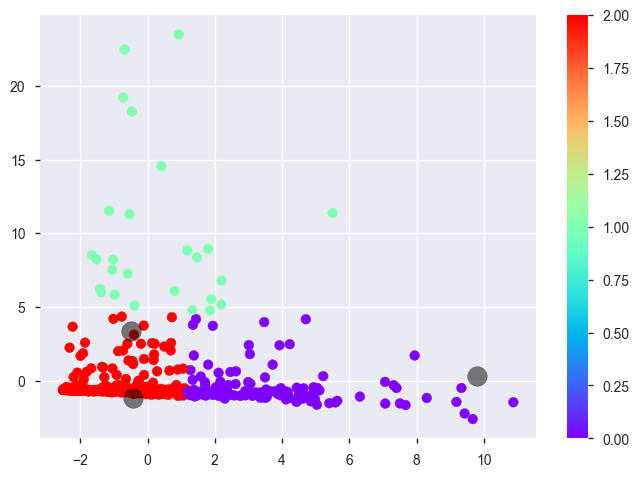

In [215]:
fig = plt.figure()
ax = fig.add_subplot(111)
centers = kmeans.cluster_centers_
scatter = ax.scatter(pca.T[1], pca.T[0], c=pred, cmap=plt.cm.rainbow)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.colorbar(scatter)

### df_ohehotted

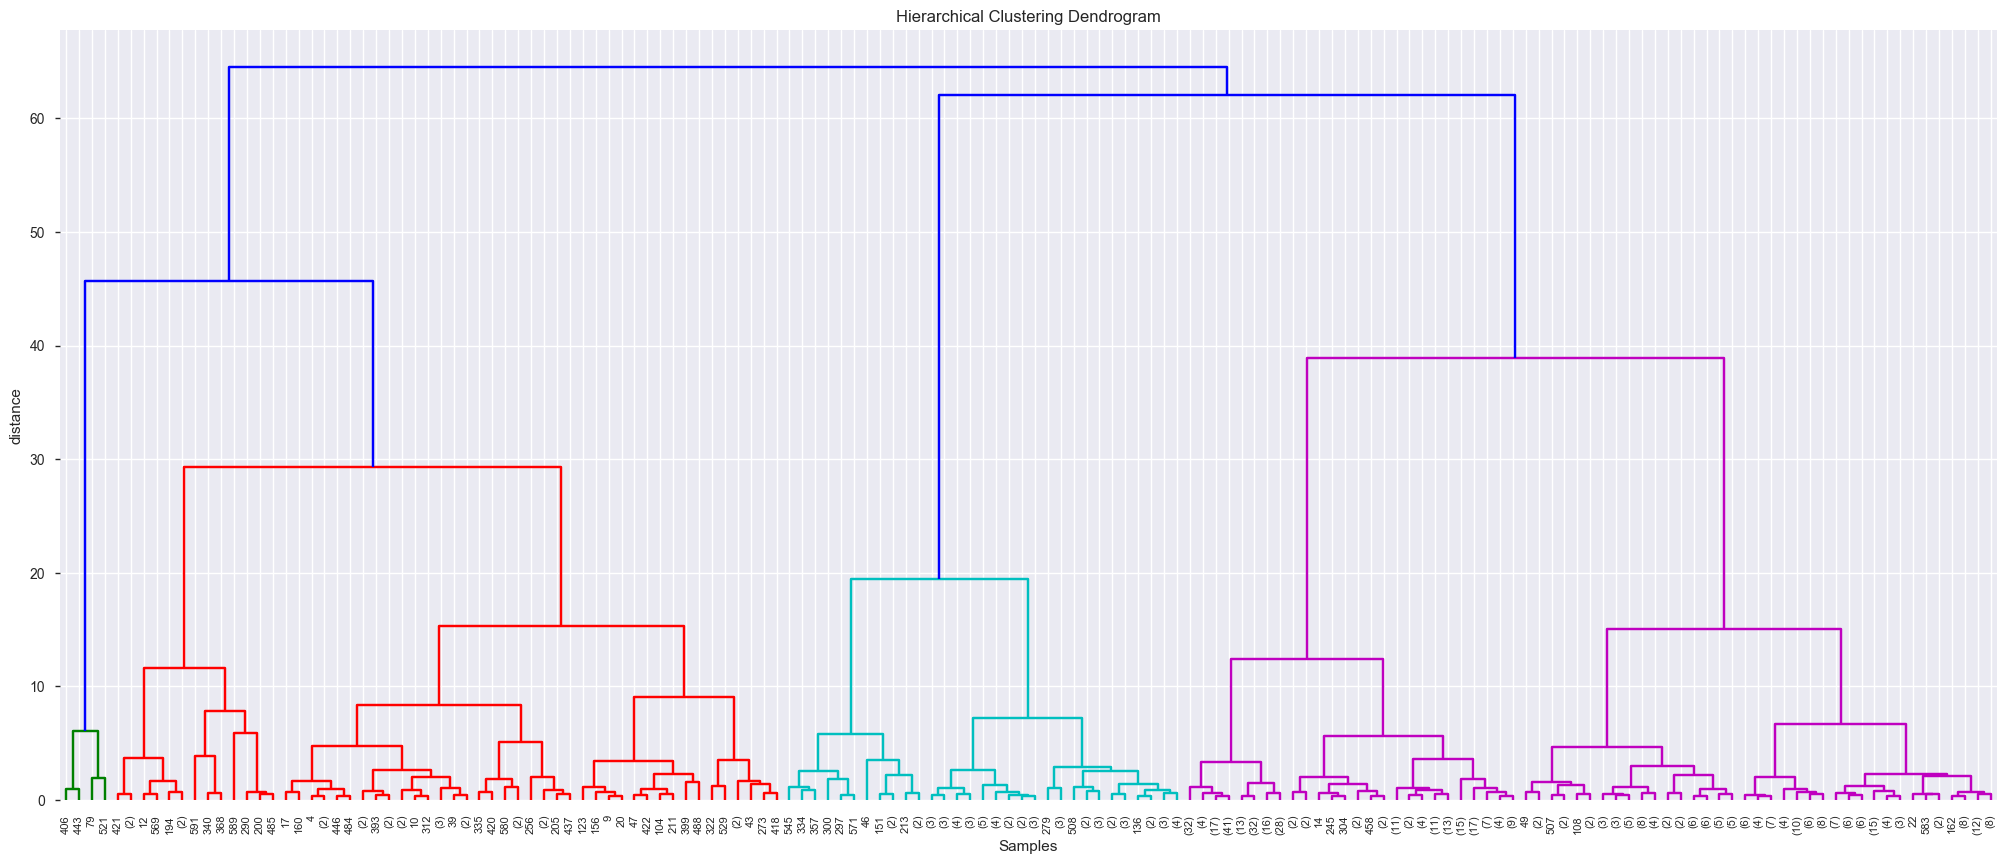

In [211]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(pca, 'ward')

# set cut-off to 150
max_d = 150             # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

In [212]:
new_new = df.drop(reject+["AGE", "GENDER", "CITY", "SUBSCRIBER_ID", "REV_201706", "REV_201707", "REV_201708"], axis=1).drop_duplicates()

In [213]:
merged = pd.concat([new_new, pd.DataFrame({ "target": pred })], axis=1)

In [214]:
merged.groupby("target").describe().T

target                                 0            1             2
INT_CALLS_CNT_201706 count    145.000000    26.000000    429.000000
                     mean       1.875862    45.884615      1.158508
                     std        5.614815    27.048589      4.275889
                     min        0.000000    18.000000      0.000000
                     25%        0.000000    27.750000      0.000000
                     50%        0.000000    38.500000      0.000000
                     75%        0.000000    59.000000      0.000000
                     max       41.000000   122.000000     44.000000
INT_CALLS_CNT_201707 count    145.000000    26.000000    429.000000
                     mean       1.972414    48.884615      1.205128
                     std        4.752112    40.230662      4.534383
                     min        0.000000     6.000000      0.000000
                     25%        0.000000    22.250000      0.000000
                     50%        0.000000    41.500000      0.000000
                     75%        1.000000    62.500000      0.000000
                     max       25.000000   174.000000     56.000000
INT_CALLS_CNT_201708 count    145.000000    26.000000    429.000000
                     mean       1.689655    42.846154      1.519814
                     std        4.583359    34.511091      5.883821
                     min        0.000000     0.000000      0.000000
                     25%        0.000000    21.500000      0.000000
                     50%        0.000000    30.500000      0.000000
                     75%        1.000000    55.000000      0.000000
                     max       28.000000   124.000000     61.000000
INT_CALLS_DUR_201706 count    145.000000    26.000000    429.000000
                     mean       4.351609   131.596154      2.365423
                     std       12.826628    77.181889      9.932334
                     min        0.000000    24.133333      0.000000
                     25%        0.000000    68.625000      0.000000
                     50%        0.000000   120.433334      0.000000
...                                  ...          ...           ...
data_rev_201706      std     1922.096505  1300.555323    482.148623
                     min        0.000000     0.000000      0.000000
                     25%       15.973200     0.000000      0.000000
                     50%      961.642900     0.241050      3.187500
                     75%     1706.580310   765.680803    388.392857
                     max    17116.642900  6227.151770   4135.169670
data_rev_201707      count    145.000000    26.000000    429.000000
                     mean    1627.075491   472.214627    329.068702
                     std     1889.297444   817.516883    770.755026
                     min        0.000000     0.000000      0.000000
                     25%       98.357100     0.000000      0.000000
                     50%     1079.464290    25.799100      4.223200
                     75%     2229.696460   604.294675    421.428571
                     max    10678.571400  3234.607190  11100.133900
data_rev_201708      count    145.000000    26.000000    429.000000
                     mean    1762.291258   608.266826    340.492508
                     std     1954.446775   900.541101    667.605432
                     min        0.000000     0.000000      0.000000
                     25%       52.678571     0.000000      0.000000
                     50%     1361.053600    65.281250      5.250000
                     75%     2232.142860  1063.419643    447.723171
                     max     9350.250000  3354.901800   5153.169600
data_rev_201709      count    145.000000    26.000000    429.000000
                     mean    1571.227339   746.631184    326.183712
                     std     1814.990984  1196.914526    622.552840
                     min        0.000000     0.000000      0.000000
                     25%       42.455400     0.000000   